In [1]:
import numpyro
import numpy as np
import pandas as pd
import seaborn as sns
import jax.numpy as jnp
import matplotlib.pyplot as plt
import numpyro.distributions as dist

from tqdm import tqdm
from jax import random
from numpyro import handlers
from numpyro.optim import Adam
from numpyro.infer import MCMC, HMC, NUTS, DiscreteHMCGibbs, SVI, autoguide, Trace_ELBO
from numpyro.infer.reparam import LocScaleReparam
from utils import select_columns, samples_to_df, df_to_samples, plot_ESS, plot_GR, plot_posterior

numpyro.set_platform("cpu")
numpyro.set_host_device_count(32)

num_samples = 2000
num_chains = 10

In [52]:
def model_vip(alpha):
    z = numpyro.sample("z", dist.Normal(0, 1))
    with numpyro.plate("plate", 2):
        x_hat = numpyro.sample("x_hat", dist.Normal(0, jnp.exp(alpha * z)))
        x = numpyro.deterministic("x", x_hat * jnp.exp((1 - alpha) * z))
        y = numpyro.sample("y", dist.Normal(x, 5), obs=jnp.ones((2,)) * 20)

In [69]:
# Start from this source of randomness. We will split keys for subsequent operations.
rng_key = random.PRNGKey(np.random.randint(1, 1000))
kernel = NUTS(model_vip)
mcmc = MCMC(kernel, num_warmup=num_samples, num_samples=num_samples, num_chains=num_chains)

rng_key, rng_key_ = random.split(rng_key)
mcmc.run(rng_key_, 0)
mcmc.print_summary(exclude_deterministic=False)
samples_0 = mcmc.get_samples()
df_0 = samples_to_df(samples_0)

rng_key, rng_key_ = random.split(rng_key)
mcmc.run(rng_key_, 0.25)
mcmc.print_summary(exclude_deterministic=False)
samples_25 = mcmc.get_samples()
df_25 = samples_to_df(samples_25)

rng_key, rng_key_ = random.split(rng_key)
mcmc.run(rng_key_, 0.5)
mcmc.print_summary(exclude_deterministic=False)
samples_50 = mcmc.get_samples()
df_50 = samples_to_df(samples_50)

rng_key, rng_key_ = random.split(rng_key)
mcmc.run(rng_key_, 0.75)
mcmc.print_summary(exclude_deterministic=False)
samples_75 = mcmc.get_samples()
df_75 = samples_to_df(samples_75)

rng_key, rng_key_ = random.split(rng_key)
mcmc.run(rng_key_, 1)
mcmc.print_summary(exclude_deterministic=False)
samples_100 = mcmc.get_samples()
df_100 = samples_to_df(samples_100)

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      x[0]     16.62      5.05     16.61      8.13     24.64  14005.69      1.00
      x[1]     16.55      5.04     16.51      8.35     24.95  14675.64      1.00
  x_hat[0]      1.41      0.54      1.35      0.51      2.23   6161.83      1.00
  x_hat[1]      1.40      0.53      1.34      0.55      2.24   6217.59      1.00
         z      2.49      0.41      2.48      1.84      3.16   4382.53      1.00

Number of divergences: 4


  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      x[0]     16.61      5.05     16.59      8.07     24.71  15885.23      1.00
      x[1]     16.56      5.07     16.58      8.58     25.21  17010.74      1.00
  x_hat[0]      2.57      0.84      2.52      1.24      3.95   9983.77      1.00
  x_hat[1]      2.57      0.85      2.52      1.17      3.92   9726.68      1.00
         z      2.49      0.41      2.48      1.84      3.16   7279.94      1.00

Number of divergences: 0


  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      x[0]     16.56      5.05     16.58      8.23     24.75  15714.68      1.00
      x[1]     16.55      5.19     16.55      8.09     25.04  15426.28      1.00
  x_hat[0]      4.72      1.37      4.69      2.53      7.03  12814.11      1.00
  x_hat[1]      4.72      1.42      4.69      2.43      7.05  12805.05      1.00
         z      2.49      0.42      2.49      1.83      3.17   8539.45      1.00

Number of divergences: 1


  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      x[0]     16.54      4.97     16.52      8.40     24.70  15140.47      1.00
      x[1]     16.62      5.06     16.62      8.35     24.97  14703.69      1.00
  x_hat[0]      8.79      2.47      8.81      4.73     12.80  15978.58      1.00
  x_hat[1]      8.82      2.51      8.85      4.71     12.96  15096.07      1.00
         z      2.50      0.41      2.49      1.85      3.18  11795.65      1.00

Number of divergences: 0


  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]

  0%|          | 0/4000 [00:00<?, ?it/s]


                mean       std    median      5.0%     95.0%     n_eff     r_hat
      x[0]     16.60      5.06     16.61      8.40     24.87  11298.24      1.00
      x[1]     16.61      5.06     16.59      8.56     25.18  11677.02      1.00
  x_hat[0]     16.60      5.06     16.61      8.40     24.87  11298.24      1.00
  x_hat[1]     16.61      5.06     16.59      8.56     25.18  11677.02      1.00
         z      2.49      0.41      2.48      1.85      3.19   9945.81      1.00

Number of divergences: 0


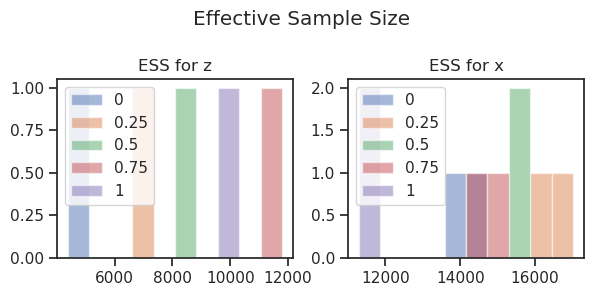

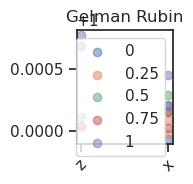

/home/sangho/anaconda3/envs/ppl/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(
/home/sangho/anaconda3/envs/ppl/lib/python3.9/site-packages/seaborn/distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


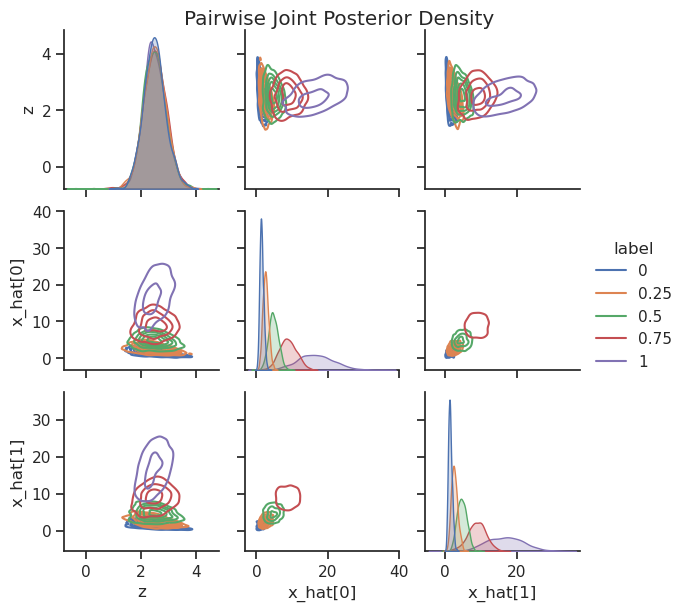

In [70]:
dfs = [df_0, df_25, df_50, df_75, df_100]
labels = ["0", "0.25", "0.5", "0.75", "1"]

plot_ESS(dfs, labels,
         params=["z", "x"],
         num_chains=num_chains, num_samples=num_samples)

plot_GR(dfs, labels,
        params=["z", "x"],
        num_chains=num_chains, num_samples=num_samples)

plot_posterior(dfs, labels,
               params=["z", "x_hat[0]", "x_hat[1]"],
               num_subsamples=1000)